# Unit 5 - Financial Planning

In [80]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

NameError: name 'apikey' is not defined

In [81]:
ls -a

./                           Untitled Folder/
../                          Untitled.ipynb
.DS_Store                    Untitled1.ipynb
.env                         __pycache__/
.ipynb_checkpoints/          financial-planner (1).ipynb
MCForecastTools.py           financial-planner_2.ipynb


In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
# Set current amount of crypto assets
# 1.2 BTC and 5.3 ETH
# 50 SPY (stocks) and 200 AGG (bonds)
# Average household income for each member of the credit union is $12,000

In [6]:
api_key = os.getenv("QUANDL_API_KEY")

NameError: name 'api_key' is not defined

In [83]:
request_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

In [84]:
request_url = request_url + api_key

In [85]:
response_data = requests.get(request_url)

In [86]:
request_url

'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD5oGVoxMmhYUx-hAP3AN6'

In [87]:
response_data.content

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 19018312,\n\t\t\t"total_supply": 19018312,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 40740.0000000000000000,\n\t\t\t\t\t"volume_24h": 30209369394,\n\t\t\t\t\t"market_cap": 774702382079,\n\t\t\t\t\t"percentage_change_1h": -0.0048887547660628,\n\t\t\t\t\t"percentage_change_24h": -1.8934451033512100,\n\t\t\t\t\t"percentage_change_7d": -1.1300432160484400,\n\t\t\t\t\t"percent_change_1h": -0.0048887547660628,\n\t\t\t\t\t"percent_change_24h": -1.8934451033512100,\n\t\t\t\t\t"percent_change_7d": -1.1300432160484400\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1650579192\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1650579192,\n\t\t"num_cryptocurrencies": 3106,\n\t\t"error": null\n\t}\n}'

In [88]:
alpaca_api_key=os.getenv('ALPACA_API_KEY')

In [89]:
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

In [91]:
my_btc = 1.2
my_eth = 5.3

In [92]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [93]:
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19018312,
            "total_supply": 19018312,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 40740.0,
                    "volume_24h": 30209369394,
                    "market_cap": 774702382079,
                    "percentage_change_1h": -0.0048887547660628,
                    "percentage_change_24h": -1.89344510335121,
                    "percentage_change_7d": -1.13004321604844,
                    "percent_change_1h": -0.0048887547660628,
                    "percent_change_24h": -1.89344510335121,
                    "percent_change_7d": -1.13004321604844
                },
                "CAD": {
                    "price": 51263.142,
                    "volume_24h": 38012449508.4702,
                

In [94]:
# Fetch current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value = my_btc * btc_value
# Fetch current ETH price
eth_value = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value = my_eth * eth_value
# Compute current value of my crpto
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61515.77
The current value of your 5.3 ETH is $20043.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [95]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [1]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')


NameError: name 'os' is not defined

In [99]:
# Create the Alpaca API object
alpaca=tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [100]:
from datetime import datetime
# Format current date as ISO format
today = datetime.now()

In [101]:
start = pd.Timestamp("2016-03-30", tz="America/Toronto").isoformat()
end = pd.Timestamp("2022-03-30", tz="America/Toronto").isoformat()

In [102]:
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
from alpaca_trade_api.rest import REST, TimeFrame

In [103]:
# alpaca.get_bars(tickers, timeframe, start = today, end = today).df
# Get current closing prices for SPY and AGG
df_portfolio_year = alpaca.get_bars(tickers, TimeFrame.Day, "2022-03-23", "2022-03-23", adjustment='raw').df

In [104]:
#df_portfolio_year = api.get_bars(tickers, timeframe, start = start, limit = 1000).df

In [105]:
df_portfolio_year.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-23 04:00:00+00:00,106.96,107.21,106.7105,107.19,8567200,27348,106.991875,AGG
2022-03-23 04:00:00+00:00,446.90,448.49,443.7100,443.80,77982935,627281,446.058683,SPY


In [116]:

#1 - slice the df by symbol
agg_close_price = float(df_portfolio_year[df_portfolio_year['symbol'] == "AGG"]['close'])
spy_close_price = float(df_portfolio_year[df_portfolio_year['symbol'] == "SPY"]['close'])

#2 - drop the symbol column
# agg = agg_df.drop('symbol', axis=1)
# spy = spy_df.drop('symbol', axis=1)

# agg_close_price_test = float(agg['close'])
# spy_close_price_test = float(spy['close'])
print (agg_df, spy_df)

107.19 443.8


In [115]:
# Pick AGG and SPY close prices
#agg_df = float(df_portfolio_year["AGG"][close])
#spy_df = float(df_portfolio_year["SPY"][close])

KeyError: 'AGG'

In [117]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.19
Current SPY closing price: $443.8


In [120]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22190.00
The current value of your 200 AGG shares is $21438.00


In [119]:
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

In [126]:
yearly=alpaca.get_bars(tickers, "1Day", "2022-03-23", "2022-03-23", adjustment='raw').df

In [127]:
yearly.index=yearly.index.date

In [37]:
df_portfolio_year

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-23 04:00:00+00:00,106.96,107.21,106.7105,107.19,8567200,27348,106.991875,AGG
2022-03-23 04:00:00+00:00,446.90,448.49,443.7100,443.80,77982935,627281,446.058683,SPY


In [128]:
df_portfolio_year = df_portfolio_year[['close','symbol']]
df_portfolio_year.index = df_portfolio_year.index.date
df_portfolio_year

,close,symbol
2022-03-23,107.19,AGG
2022-03-23,443.80,SPY


### Savings Health Analysis

In [129]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
df_savings 

,amount
crypto,81559.686605
shares,43628.000000


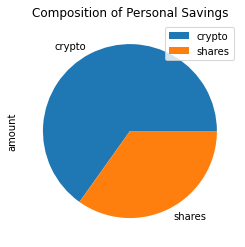

In [132]:
df_savings.plot.pie(y="amount", title="Composition of Personal Savings");

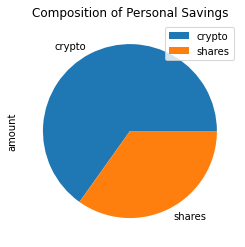

In [133]:
df_savings.plot.pie(y="amount", title="Composition of Personal Savings");

In [134]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in this fund.")
elif emergency_fund == total_savings:
        print("Congratulations on reaching your financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [135]:
from MCForecastTools import MCSimulation

In [136]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-30', tz='America/Toronto').isoformat()
end_date = pd.Timestamp('2022-03-30', tz='America/Toronto').isoformat()

In [147]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = alpaca.get_bars(tickers, "1Day", '2021-03-30', '2022-03-30', adjustment='raw').df

In [166]:
agg_test = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
spy_test = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

df_test = pd.concat([agg_test, spy_test], axis=1, keys=tickers)
df_test

AGG                                                   \
              open      high      low   close    volume trade_count   
2021-03-30  113.64  113.8500  113.525  113.81   4996946       21629   
2021-03-31  113.84  113.9800  113.710  113.83   6309151       20046   
2021-04-01  113.93  114.0500  113.830  114.04  10766423       31622   
2021-04-05  113.84  113.8900  113.690  113.81   9229625       32639   
2021-04-06  113.98  114.2200  113.950  114.21   4859922       19800   
...            ...       ...      ...     ...       ...         ...   
2022-03-24  106.72  107.0350  106.650  106.95   7378690       23320   
2022-03-25  106.65  106.6500  105.975  106.10  10295813       37569   
2022-03-28  106.25  106.5252  106.160  106.36   8540551       27246   
2022-03-29  106.61  106.8900  106.455  106.86  11396549       33651   
2022-03-30  106.60  107.1500  106.590  107.15  11544378       24975   

                           SPY                                       \
                  vwap    open     high      low   close     volume   
2021-03-30  113.725016  394.35  395.450  393.020  394.73   76263758   
2021-03-31  113.851382  395.35  398.000  395.310  396.33  112826049   
2021-04-01  113.979773  398.34  400.670  398.180  400.61   99157757   
2021-04-05  113.804845  403.49  406.940  403.380  406.36   91242966   
2021-04-06  114.112076  405.83  407.240  405.400  406.12   61766326   
...                ...     ...      ...      ...     ...        ...   
2022-03-24  106.879605  445.82  450.500  444.760  450.48   61411569   
2022-03-25  106.190724  451.09  452.980  448.430  452.69   77199328   
2022-03-28  106.295912  452.05  455.910  450.060  455.84   68744767   
2022-03-29  106.734051  460.07  462.070  457.180  461.53   86682895   
2022-03-30  107.007713  460.29  461.195  456.465  458.79   79668682   

                                    
           trade_count        vwap  
2021-03-30      435225  394.453270  
2021-03-31      481278  396.340504  
2021-04-01      386557  398.274085  
2021-04-05      446985  404.939779  
2021-04-06      330698  406.378556  
...                ...         ...  
2022-03-24      526865  447.609014  
2022-03-25      661033  451.047221  
2022-03-28      624225  453.296491  
2022-03-29      738526  459.632992  
2022-03-30      659199  459.158702  

[254 rows x 14 columns]

In [172]:
mc = MCSimulation(
    portfolio_data = df_test
    , weights = [.50,.50]
    , num_simulation = 500
    , num_trading_days = 252*6    
    
)

In [173]:
mc.portfolio_data.head()

AGG                                                             \
              open    high      low   close    volume trade_count        vwap   
2021-03-30  113.64  113.85  113.525  113.81   4996946       21629  113.725016   
2021-03-31  113.84  113.98  113.710  113.83   6309151       20046  113.851382   
2021-04-01  113.93  114.05  113.830  114.04  10766423       31622  113.979773   
2021-04-05  113.84  113.89  113.690  113.81   9229625       32639  113.804845   
2021-04-06  113.98  114.22  113.950  114.21   4859922       19800  114.112076   

                            SPY                                     \
           daily_return    open    high     low   close     volume   
2021-03-30          NaN  394.35  395.45  393.02  394.73   76263758   
2021-03-31     0.000176  395.35  398.00  395.31  396.33  112826049   
2021-04-01     0.001845  398.34  400.67  398.18  400.61   99157757   
2021-04-05    -0.002017  403.49  406.94  403.38  406.36   91242966   
2021-04-06     0.003515  405.83  407.24  405.40  406.12   61766326   

                                                 
           trade_count        vwap daily_return  
2021-03-30      435225  394.453270          NaN  
2021-03-31      481278  396.340504     0.004053  
2021-04-01      386557  398.274085     0.010799  
2021-04-05      446985  404.939779     0.014353  
2021-04-06      330698  406.378556    -0.000591

In [174]:
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/emilianomendez/Financial Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991158,1.006559,0.994310,0.995377,0.994142,0.999808,0.995571,0.994631,0.998533,0.993420,...,0.995564,0.991114,0.999766,1.002948,1.006110,1.004913,1.007169,0.999895,1.003624,1.003829
2,0.988266,1.002540,1.000665,1.001439,0.993708,0.997624,0.990782,1.001364,1.012592,0.999957,...,0.995999,0.988494,1.000421,0.993109,1.003902,1.013991,1.004220,0.990117,1.001223,1.001192
3,0.982464,1.005447,1.003038,1.003303,0.991000,1.004097,0.992422,0.994167,1.015513,1.001390,...,0.990253,0.992171,0.999140,0.991653,1.007700,1.017998,1.003666,0.988605,0.999546,0.995085
4,0.981298,1.004064,1.010784,1.003893,0.985303,1.005575,0.983813,0.994848,1.009856,1.007565,...,0.988179,0.997805,1.000828,0.990262,1.010052,1.017768,1.006022,1.001953,0.999710,0.992636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,1.574527,1.014411,1.184469,1.343323,1.723352,1.263266,0.986901,1.612868,1.566094,1.090794,...,1.440874,1.751677,1.062159,1.068664,1.073495,1.935608,1.154226,1.970937,1.508072,0.930947
1509,1.571297,1.024922,1.182114,1.331767,1.722688,1.255477,0.997271,1.621742,1.573797,1.094142,...,1.441085,1.760336,1.062218,1.064604,1.077828,1.934576,1.159603,1.982361,1.514706,0.936041
1510,1.568919,1.031566,1.186961,1.329851,1.720467,1.264995,0.999295,1.615481,1.570252,1.092977,...,1.427646,1.761305,1.068371,1.070513,1.081272,1.939299,1.169854,1.960946,1.513360,0.932097
1511,1.559886,1.019280,1.193046,1.334555,1.725576,1.257908,0.997687,1.606738,1.553923,1.103061,...,1.419868,1.763461,1.073644,1.069235,1.077827,1.955581,1.170155,1.962545,1.513928,0.930267


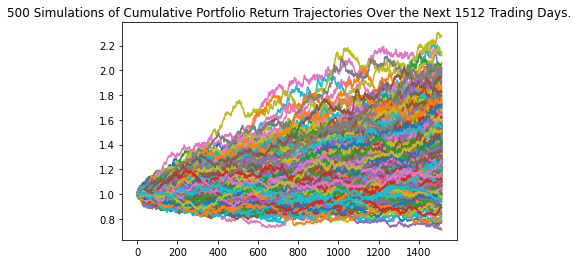

In [175]:
line = mc.plot_simulation()

In [148]:
df_stock_data.index = df_stock_data.index.date

In [149]:
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2021-03-30,113.64,113.85,113.525,113.81,4996946,21629,113.725016,AGG
2021-03-31,113.84,113.98,113.710,113.83,6309151,20046,113.851382,AGG
2021-04-01,113.93,114.05,113.830,114.04,10766423,31622,113.979773,AGG
2021-04-05,113.84,113.89,113.690,113.81,9229625,32639,113.804845,AGG
2021-04-06,113.98,114.22,113.950,114.21,4859922,19800,114.112076,AGG


In [150]:
def get_data(ticker_name, start_date, end_date):
    df_ticker = alpaca.get_bars(ticker_name, TimeFrame.Day, start_date, end_date, adjustment='raw').df
    df_ticker.index = df_ticker.index.date
    df_ticker=df_ticker[['close']]
    
    return df_ticker

In [151]:
df1=get_data('AGG', '2022-02-23', '2022-03-23')
df1

,close
2022-02-23,109.26
2022-02-24,109.46
2022-02-25,109.57
2022-02-28,110.36
2022-03-01,110.82
2022-03-02,109.49
2022-03-03,109.86
2022-03-04,110.30
2022-03-07,109.66
2022-03-08,109.27


In [152]:
df2=get_data('SPY', '2022-02-23', '2022-03-23')
df2

,close
2022-02-23,422.07
2022-02-24,428.30
2022-02-25,437.75
2022-02-28,436.63
2022-03-01,429.98
2022-03-02,437.89
2022-03-03,435.77
2022-03-04,432.10
2022-03-07,419.43
2022-03-08,416.25


In [153]:
initial_price = df1.iloc[-1].values[0]
initial_price

107.19

In [154]:
pct_changes = df1.pct_change()
pct_changes.dropna(inplace=True)
pct_changes.index = pd.to_datetime(pct_changes.index)
pct_changes

,close
2022-02-24,0.001830
2022-02-25,0.001005
2022-02-28,0.007210
2022-03-01,0.004168
2022-03-02,-0.012001
2022-03-03,0.003379
2022-03-04,0.004005
2022-03-07,-0.005802
2022-03-08,-0.003556
2022-03-09,-0.002105


In [155]:
pct_changes = df2.pct_change()
pct_changes.dropna(inplace=True)
pct_changes.index = pd.to_datetime(pct_changes.index)
pct_changes

,close
2022-02-24,0.014761
2022-02-25,0.022064
2022-02-28,-0.002559
2022-03-01,-0.015230
2022-03-02,0.018396
2022-03-03,-0.004841
2022-03-04,-0.008422
2022-03-07,-0.029322
2022-03-08,-0.007582
2022-03-09,0.026619


In [156]:
from random import sample

In [161]:
#possible_changes = list(pct_changes['AGG']['close'].values)
#possible_changes[0:10]

In [164]:
from random import sample
def plot_MC(ticker, start_date, end_date):
    df = get_data(ticker, start_date, end_date)
    initial_price= df.iloc[-1].values[0]
    
    pct_changes = df.pct_change()
    pct_changes.dropna(inplace=True)
    pct_changes.index = pd.to_datetime(pct_changes.index)
    
    possible_changes = list(pct_changes['close'].values)
    
   # plt.figure(figsize=(20,10))
    
    realizations = []
    for i in range (0,500):
        
        current_price = initial_price
        current_price_history = []
        for i in range (num_days):
            current_pct_change = sample(possible_changes,1)[0]
            current_price = current_price = (1+ current_pct_change)
            current_price_history.append(current_price)
            
        plt.plot(current_price_history)
        plt.title(f"Monte Carlo Simulation for {ticker}")
            
        realizations.append(current_price_history)
            
    plt.show()
        

In [165]:
plot_MC('AGG', '2022-02-23', '2022-03-23')

NameError: name 'num_days' is not defined

In [58]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

NameError: name 'MCSimulation' is not defined

In [59]:
# Printing the simulation input data
# YOUR CODE HERE!

In [60]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [61]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [62]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [64]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [65]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [67]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [68]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [69]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [71]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [72]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [73]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [74]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [75]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [77]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'ci_lower_ten' is not defined